In [1]:
import scanpy as sc
import anndata
import pl as pl
import tl as tl
import numpy as np
import time as time

/home/felix/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


------------------

## Settings

In [2]:
n_neighbors = 20
beta = 100
beta_thresh = 1.5
teta = 50
num_scales = 3
imp_channels = [1, 3, 5, 7, 9, 13]

--------------------------

## Loading data

In [3]:
filelocation =  r"/home/felix/Public/VBh_converted.h5ad"
adata = anndata.read_h5ad(filelocation)

----------------

## Preprocessing

In [4]:
sc.pp.subsample(adata, 0.05)  #subsample

adata.X = np.arcsinh(adata.X / 10)  # normalize

print('Calculating %d nearest neighbors...'%n_neighbors)
t0 = time.time()
sc.pp.neighbors(adata, n_neighbors=20)  # k nearest neighbor graph
print('...done in %s s'%(time.time()-t0))

Calculating 20 nearest neighbors...
...done in 3.74505615234375 s


In [5]:
imp_channels_names = list(adata.var_names.values[imp_channels])  # getting names of imp_channels

--------------------

## Calculate embedding

In [6]:
print('Calculating embedding of %d scales...'%num_scales)
t0 = time.time()
adata = tl.hsne(adata, imp_channel_ind=imp_channels, num_scales=num_scales)
print('...done in %s s'%(time.time()-t0))

Calculating embedding of 3 scales...
T
P
X_hsne
lm_ind
Scale Number 0 with 1373 points:
I
W
T
lm_ind
P
X_hsne
Scale Number 1 with 164 points:
I
W
T
lm_ind
P
X_hsne
Scale Number 2 with 15 points:
I
W
T
lm_ind
P
X_hsne
...done in 434.0377233028412 s


--------------------------

## Plotting

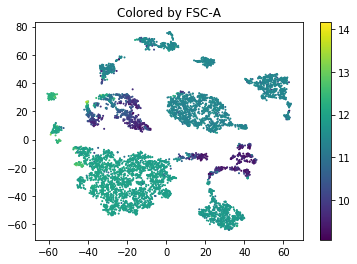

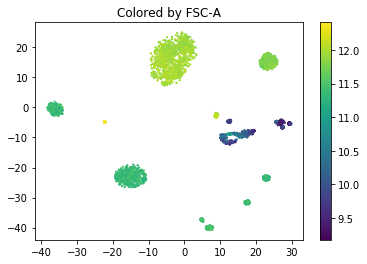

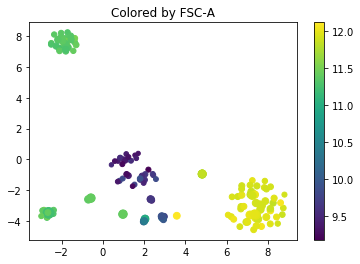

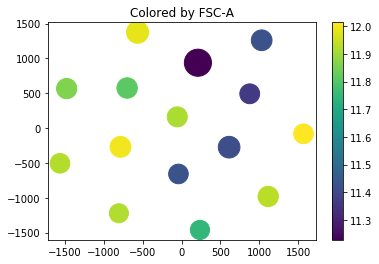

In [7]:
for scale in enumerate(adata.uns['hsne_scales']):
    pl.hsne(adata, channels_to_plot=['FSC-A'], scale_num=scale[0])

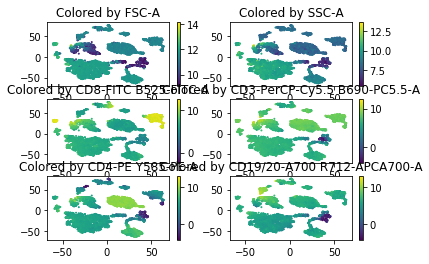

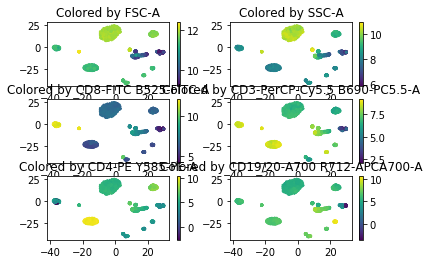

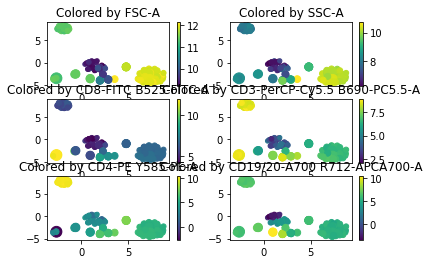

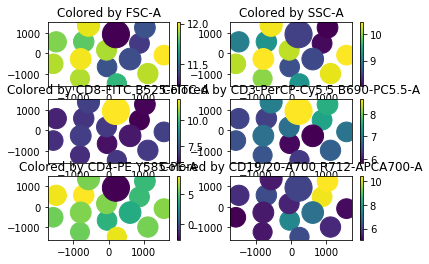

In [8]:
for scale in enumerate(adata.uns['hsne_scales']):
    pl.hsne(adata, scale_num=scale[0])

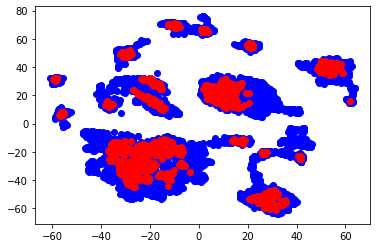

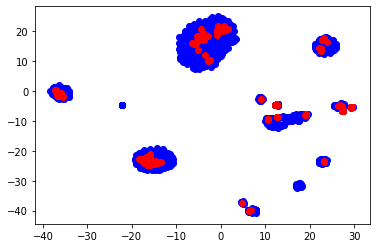

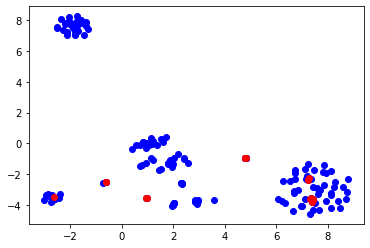

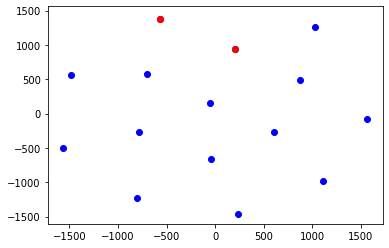

In [13]:
import matplotlib.pyplot as plt
scales = adata.uns['hsne_scales']
for s in scales:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(s.X_hsne[:, 0], s.X_hsne[:, 1], c='blue')
    ax.scatter(s.X_hsne[s.lm_ind, 0], s.X_hsne[s.lm_ind, 1], c='red')
    plt.show()